In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, fbeta_score, classification_report,
    roc_auc_score, roc_curve
)
from mlxtend.plotting import plot_decision_regions
import missingno as msno

# Display settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [3]:
# Load dataset
data = pd.read_csv("diabetes.csv")
print("Data Loaded Successfully ✅")
display(data.head())

# Check missing values
print("\nMissing values before replacement:")
print(data.isnull().any())

# Describe data
print("\nStatistical summary:")
display(data.describe().T)


Data Loaded Successfully ✅


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Missing values before replacement:
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Statistical summary:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,30.0,5.466667,3.794127,0.000,1.25000,5.500,8.000,13.000
Glucose,30.0,130.066667,32.787648,78.000,107.75000,122.000,146.500,197.000
BloodPressure,30.0,68.533333,23.919020,0.000,66.00000,73.000,83.500,96.000
SkinThickness,30.0,17.500000,17.000507,0.000,0.00000,19.000,32.750,47.000
Insulin,30.0,102.300000,182.180878,0.000,0.00000,0.000,133.750,846.000
BMI,30.0,31.636667,8.666920,0.000,27.35000,31.050,37.350,45.800
DiabetesPedigreeFunction,30.0,0.460800,0.430773,0.134,0.23525,0.344,0.535,2.288
Age,30.0,38.266667,11.343944,21.000,30.25000,33.000,50.000,59.000
Outcome,30.0,0.600000,0.498273,0.000,0.00000,1.000,1.000,1.000


In [4]:
# Replace 0 with NaN for selected columns
data_copy = data.copy(deep=True)
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_copy[cols] = data_copy[cols].replace(0, np.nan)

# Show number of missing values
print("\nMissing values after replacement:")
print(data_copy.isnull().sum())



Missing values after replacement:
Pregnancies                  0
Glucose                      0
BloodPressure                2
SkinThickness               13
Insulin                     16
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


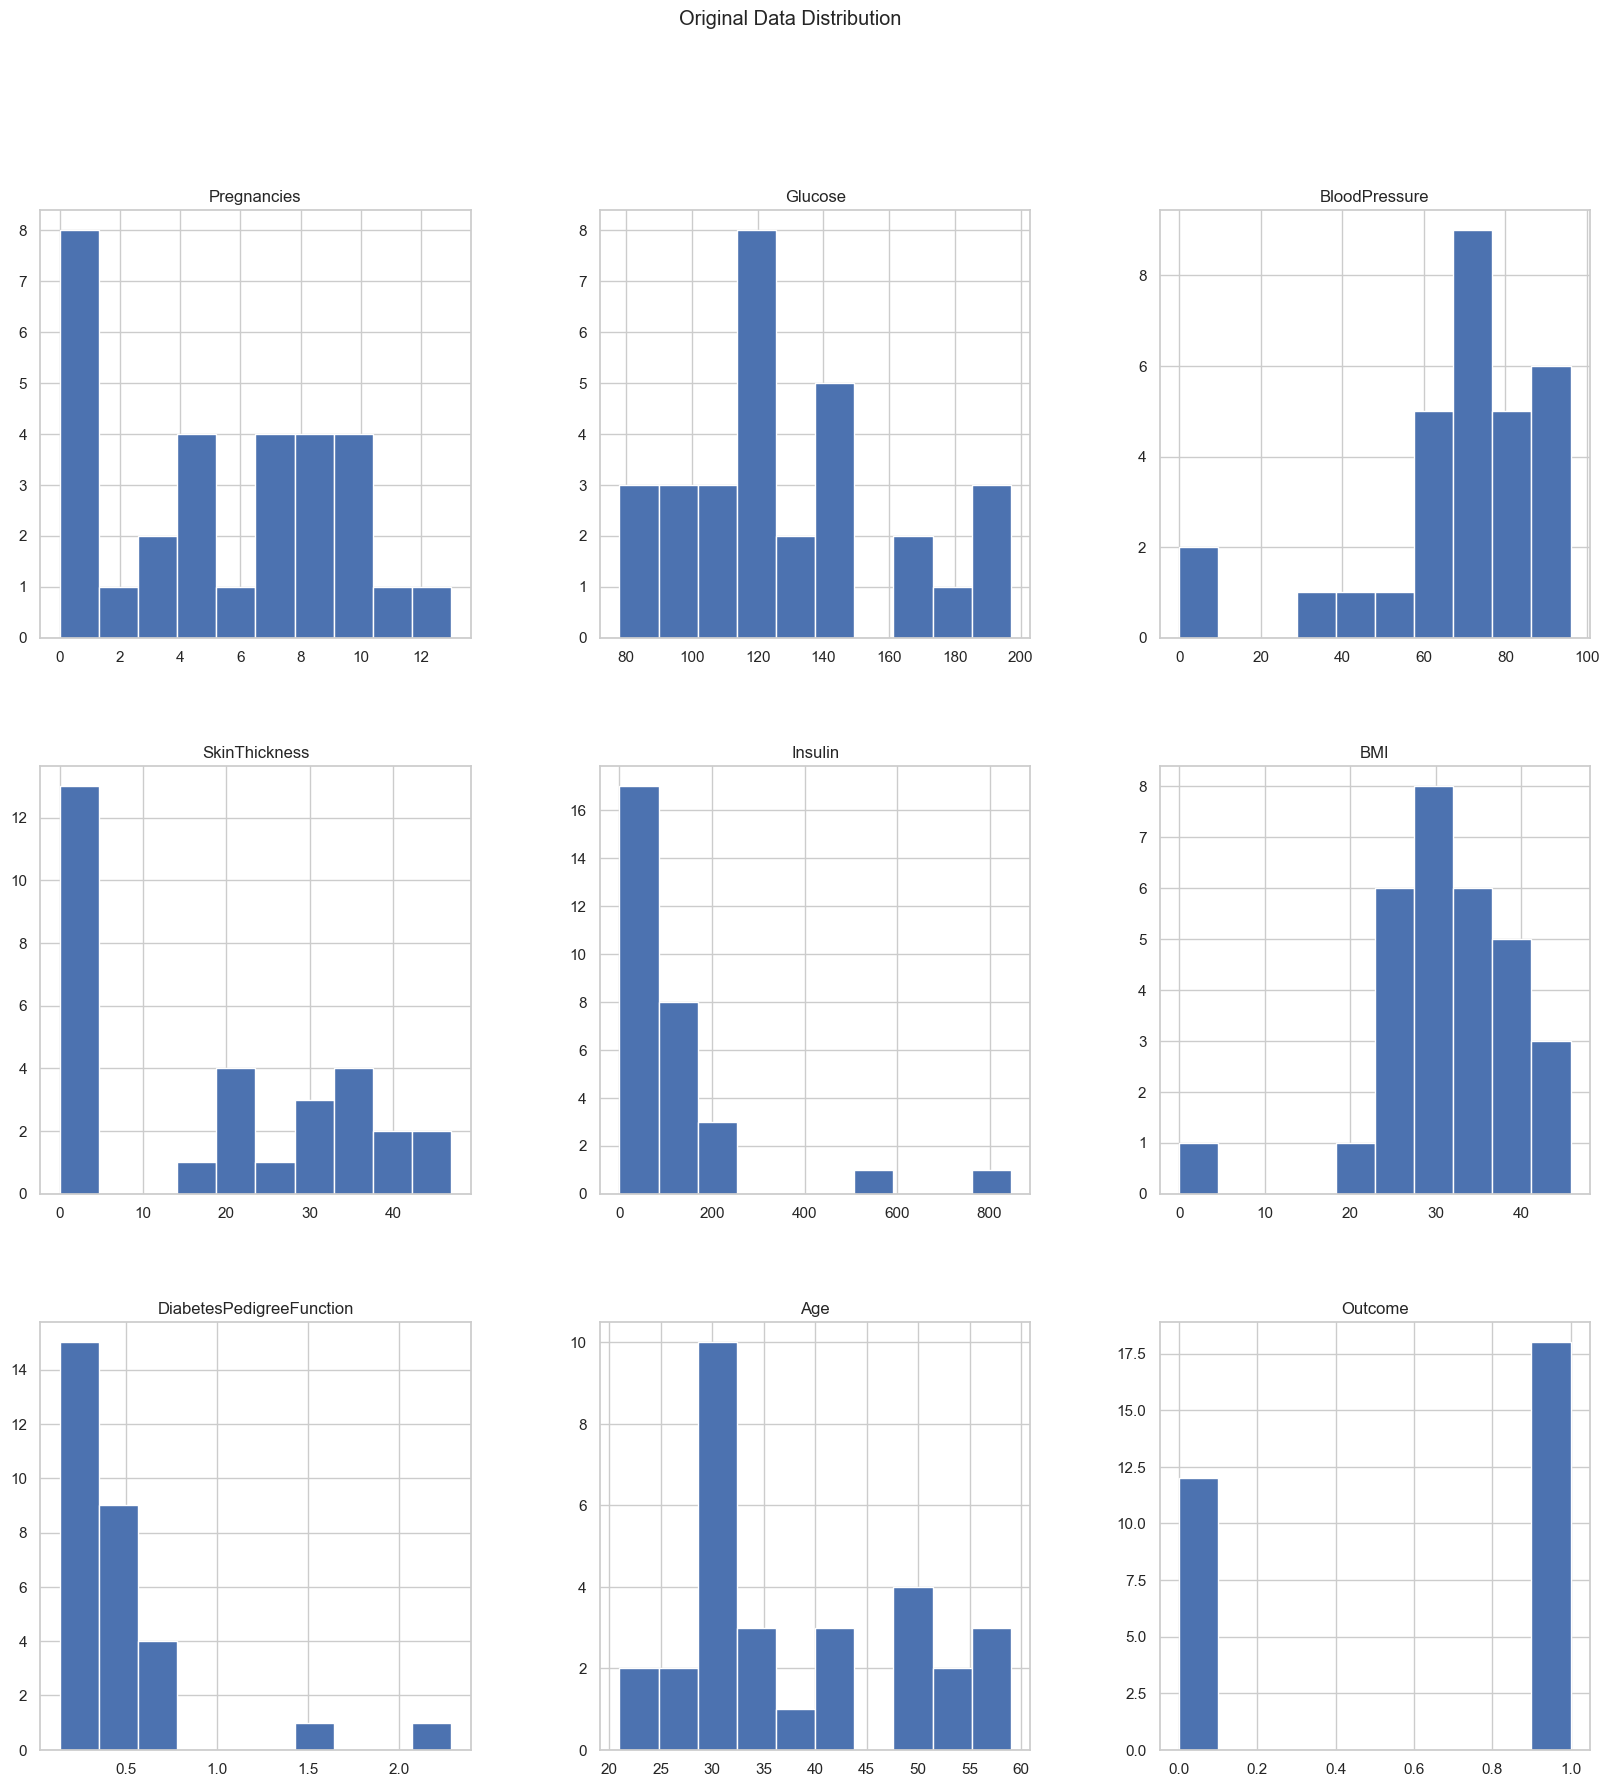

C:\Users\Tina\AppData\Local\Temp\ipykernel_8176\663910861.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
C:\Users\Tina\AppData\Local\Temp\ipykernel_8176\663910861.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

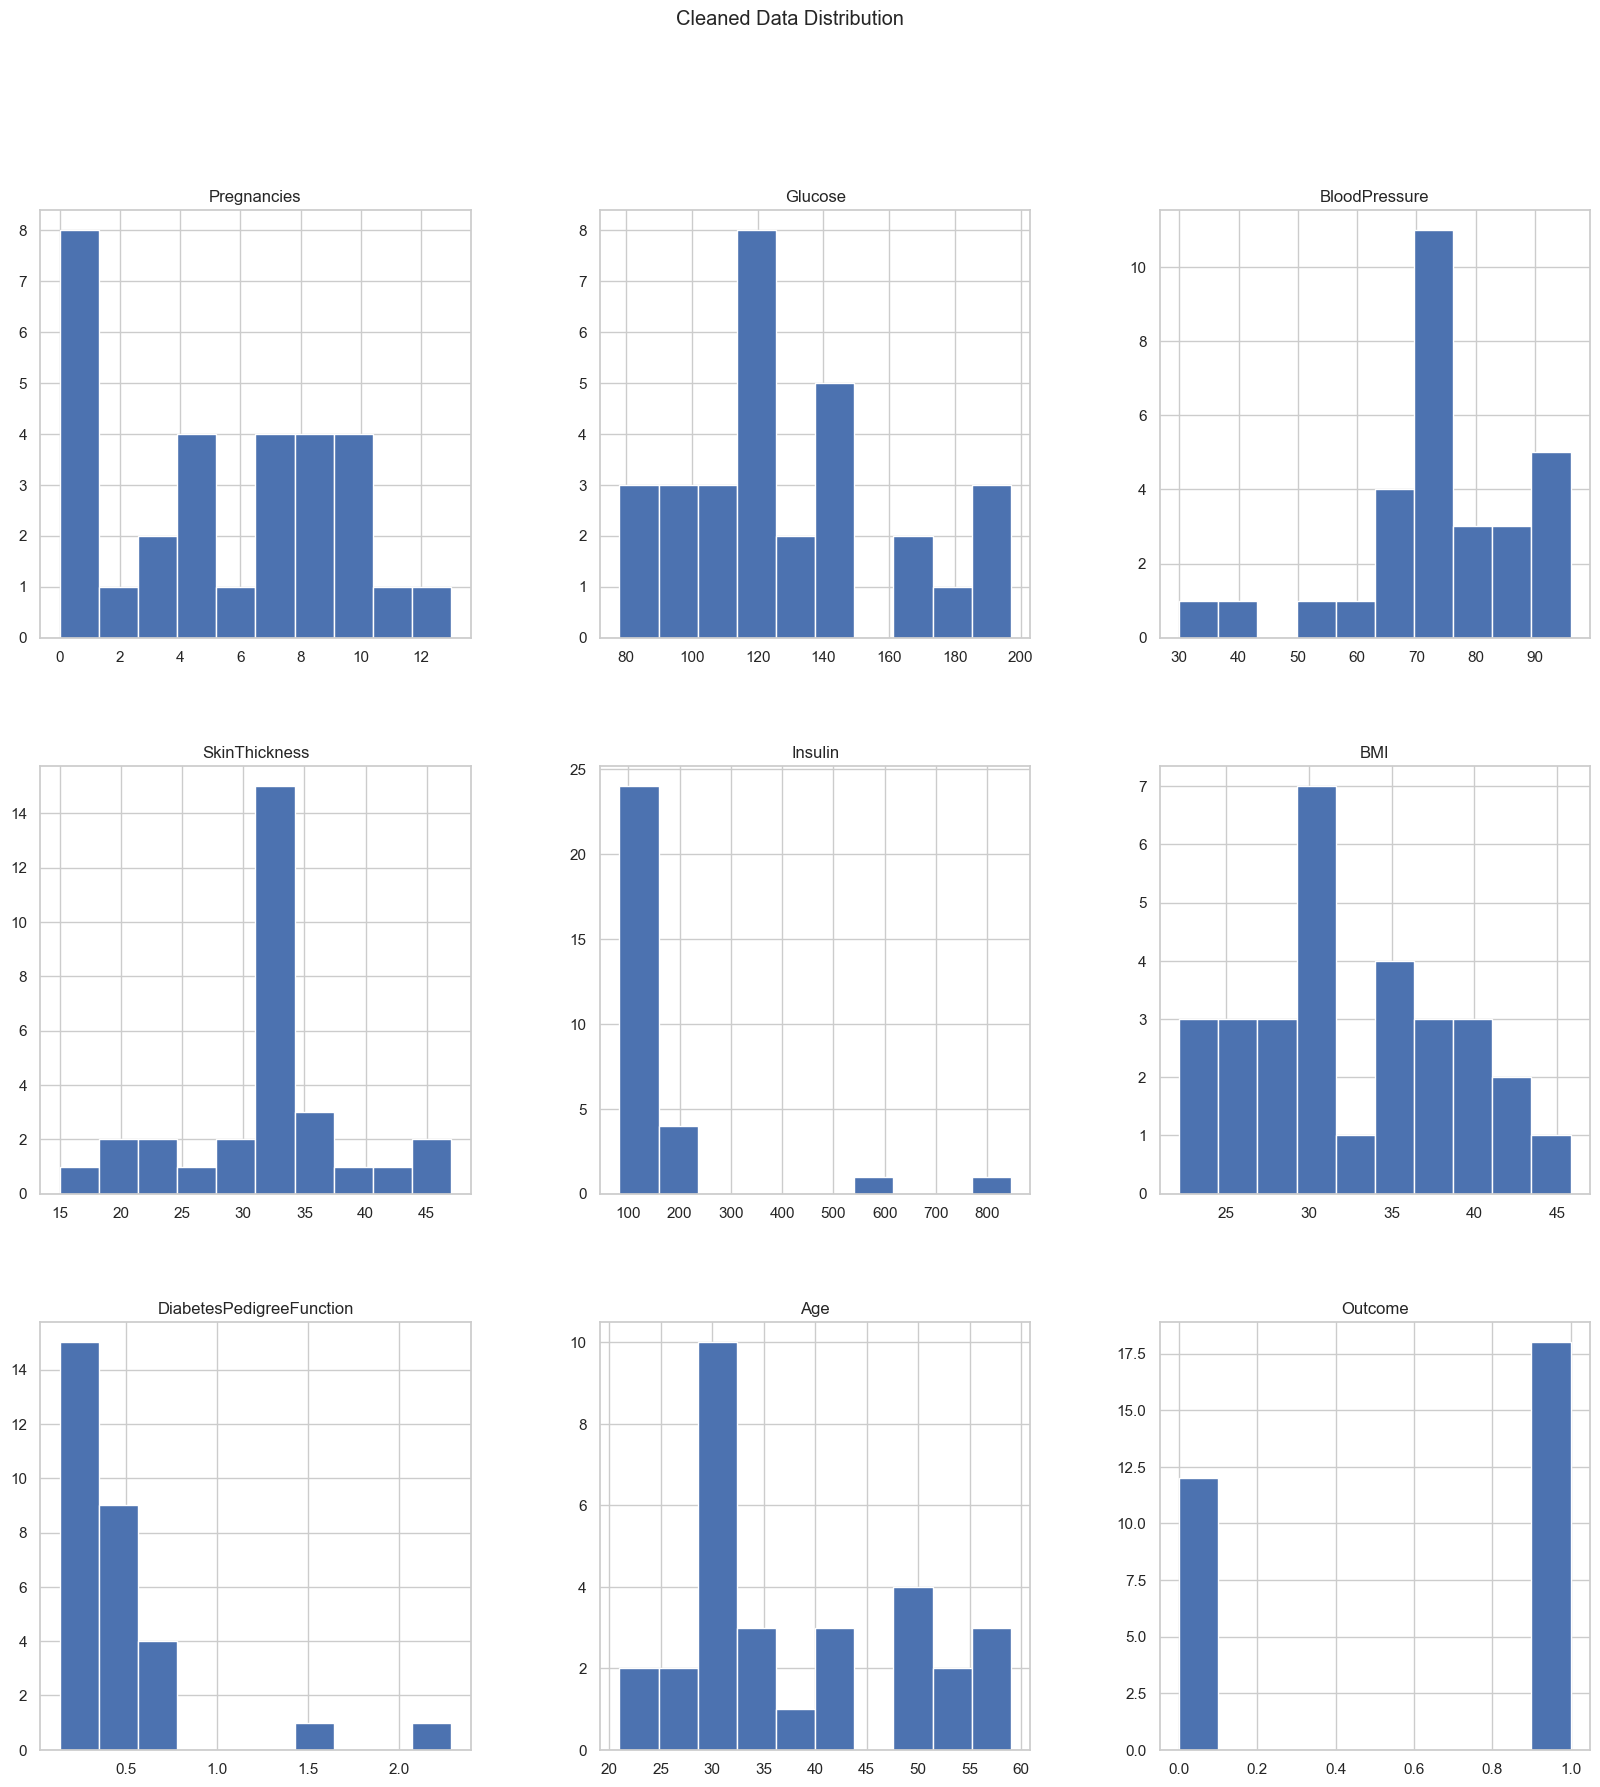

In [5]:
# Plot original data histogram
data.hist(figsize=(20, 20))
plt.suptitle("Original Data Distribution")
plt.show()

# Fill missing values with mean/median
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace=True)

# Histogram after cleaning
data_copy.hist(figsize=(20, 20))
plt.suptitle("Cleaned Data Distribution")
plt.show()


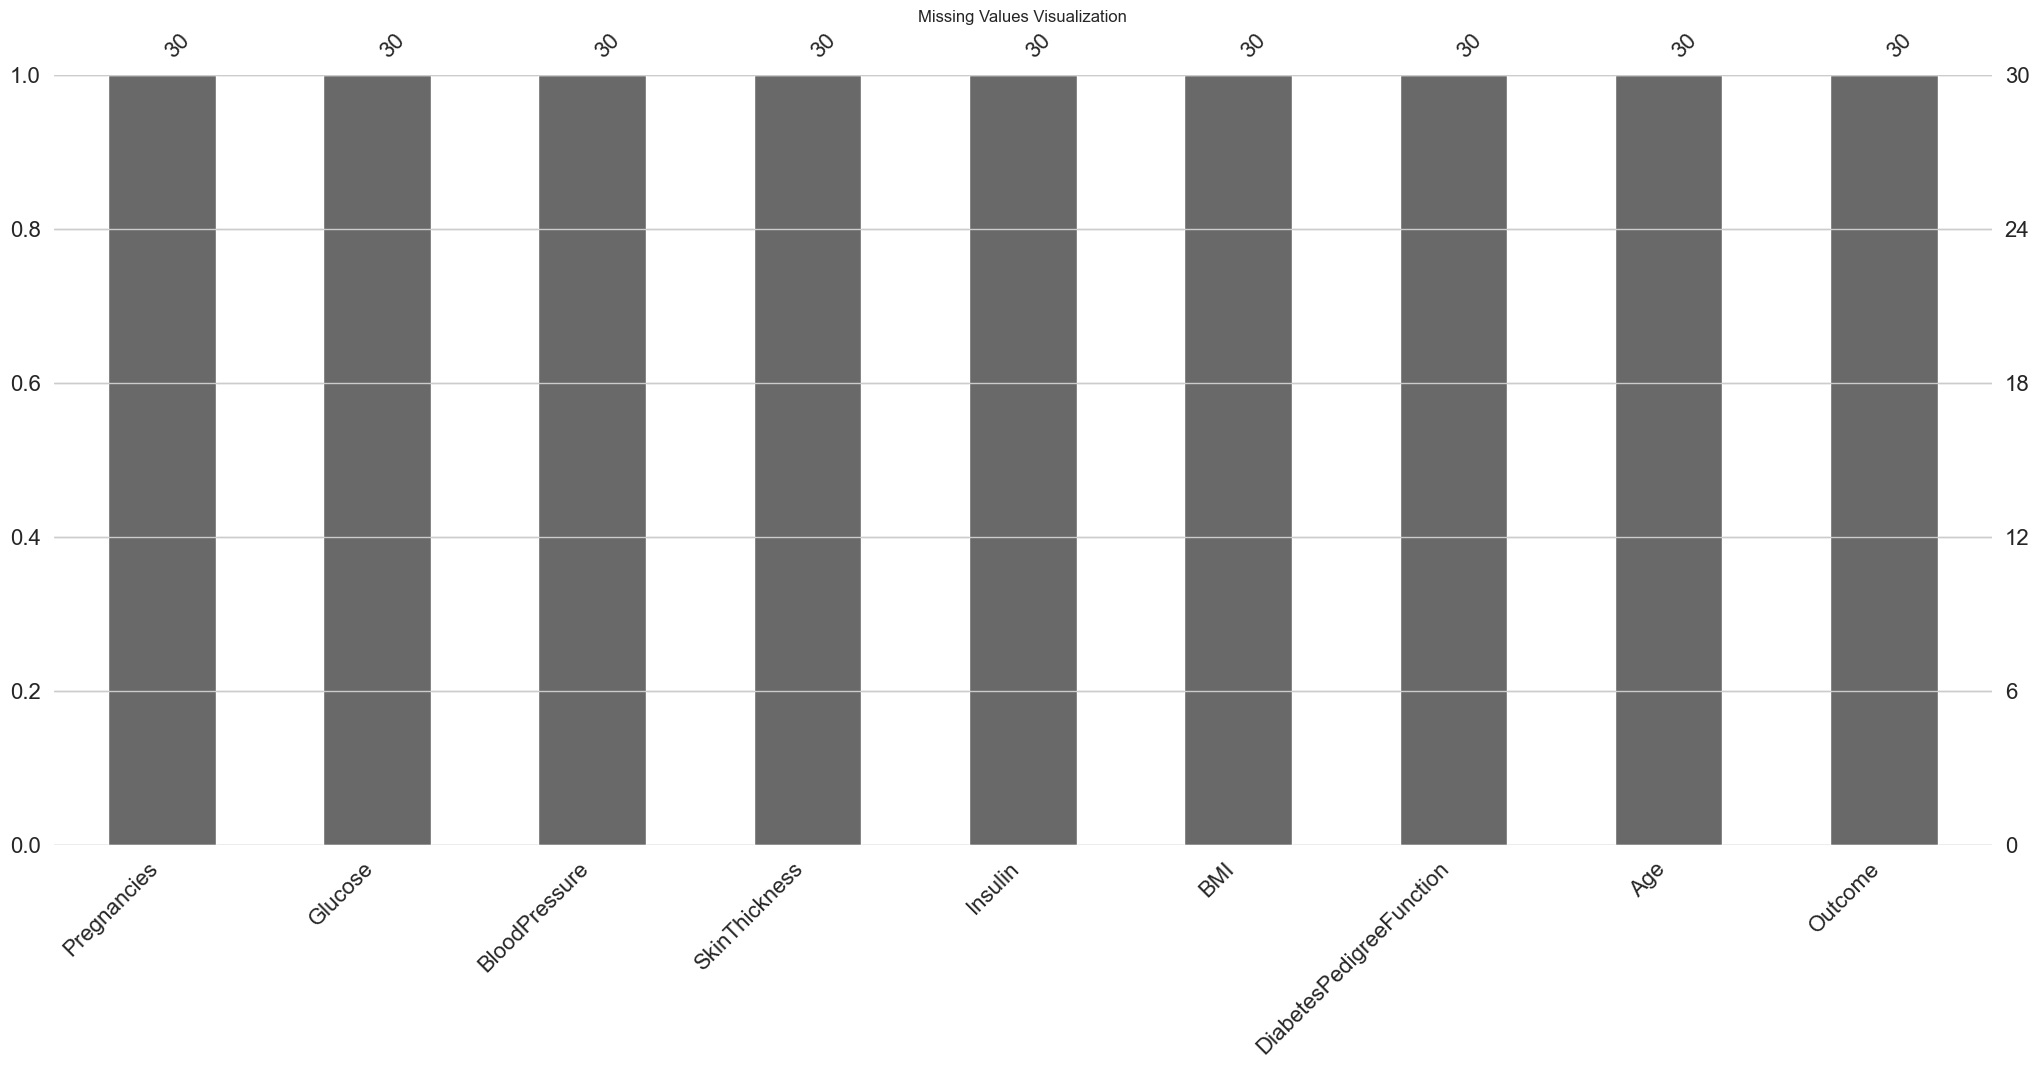

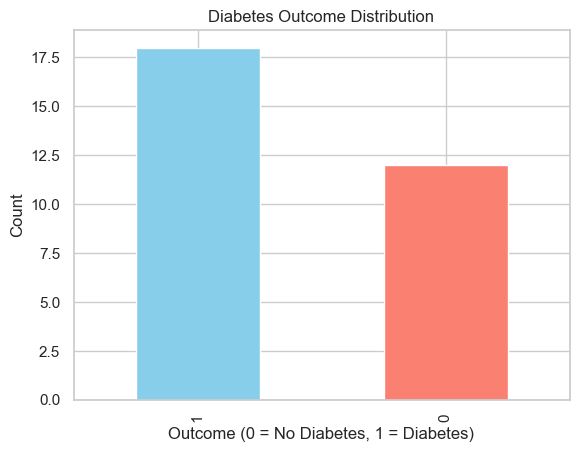

In [6]:
# Visualize missing data
msno.bar(data)
plt.title("Missing Values Visualization")
plt.show()

# Outcome distribution
data.Outcome.value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


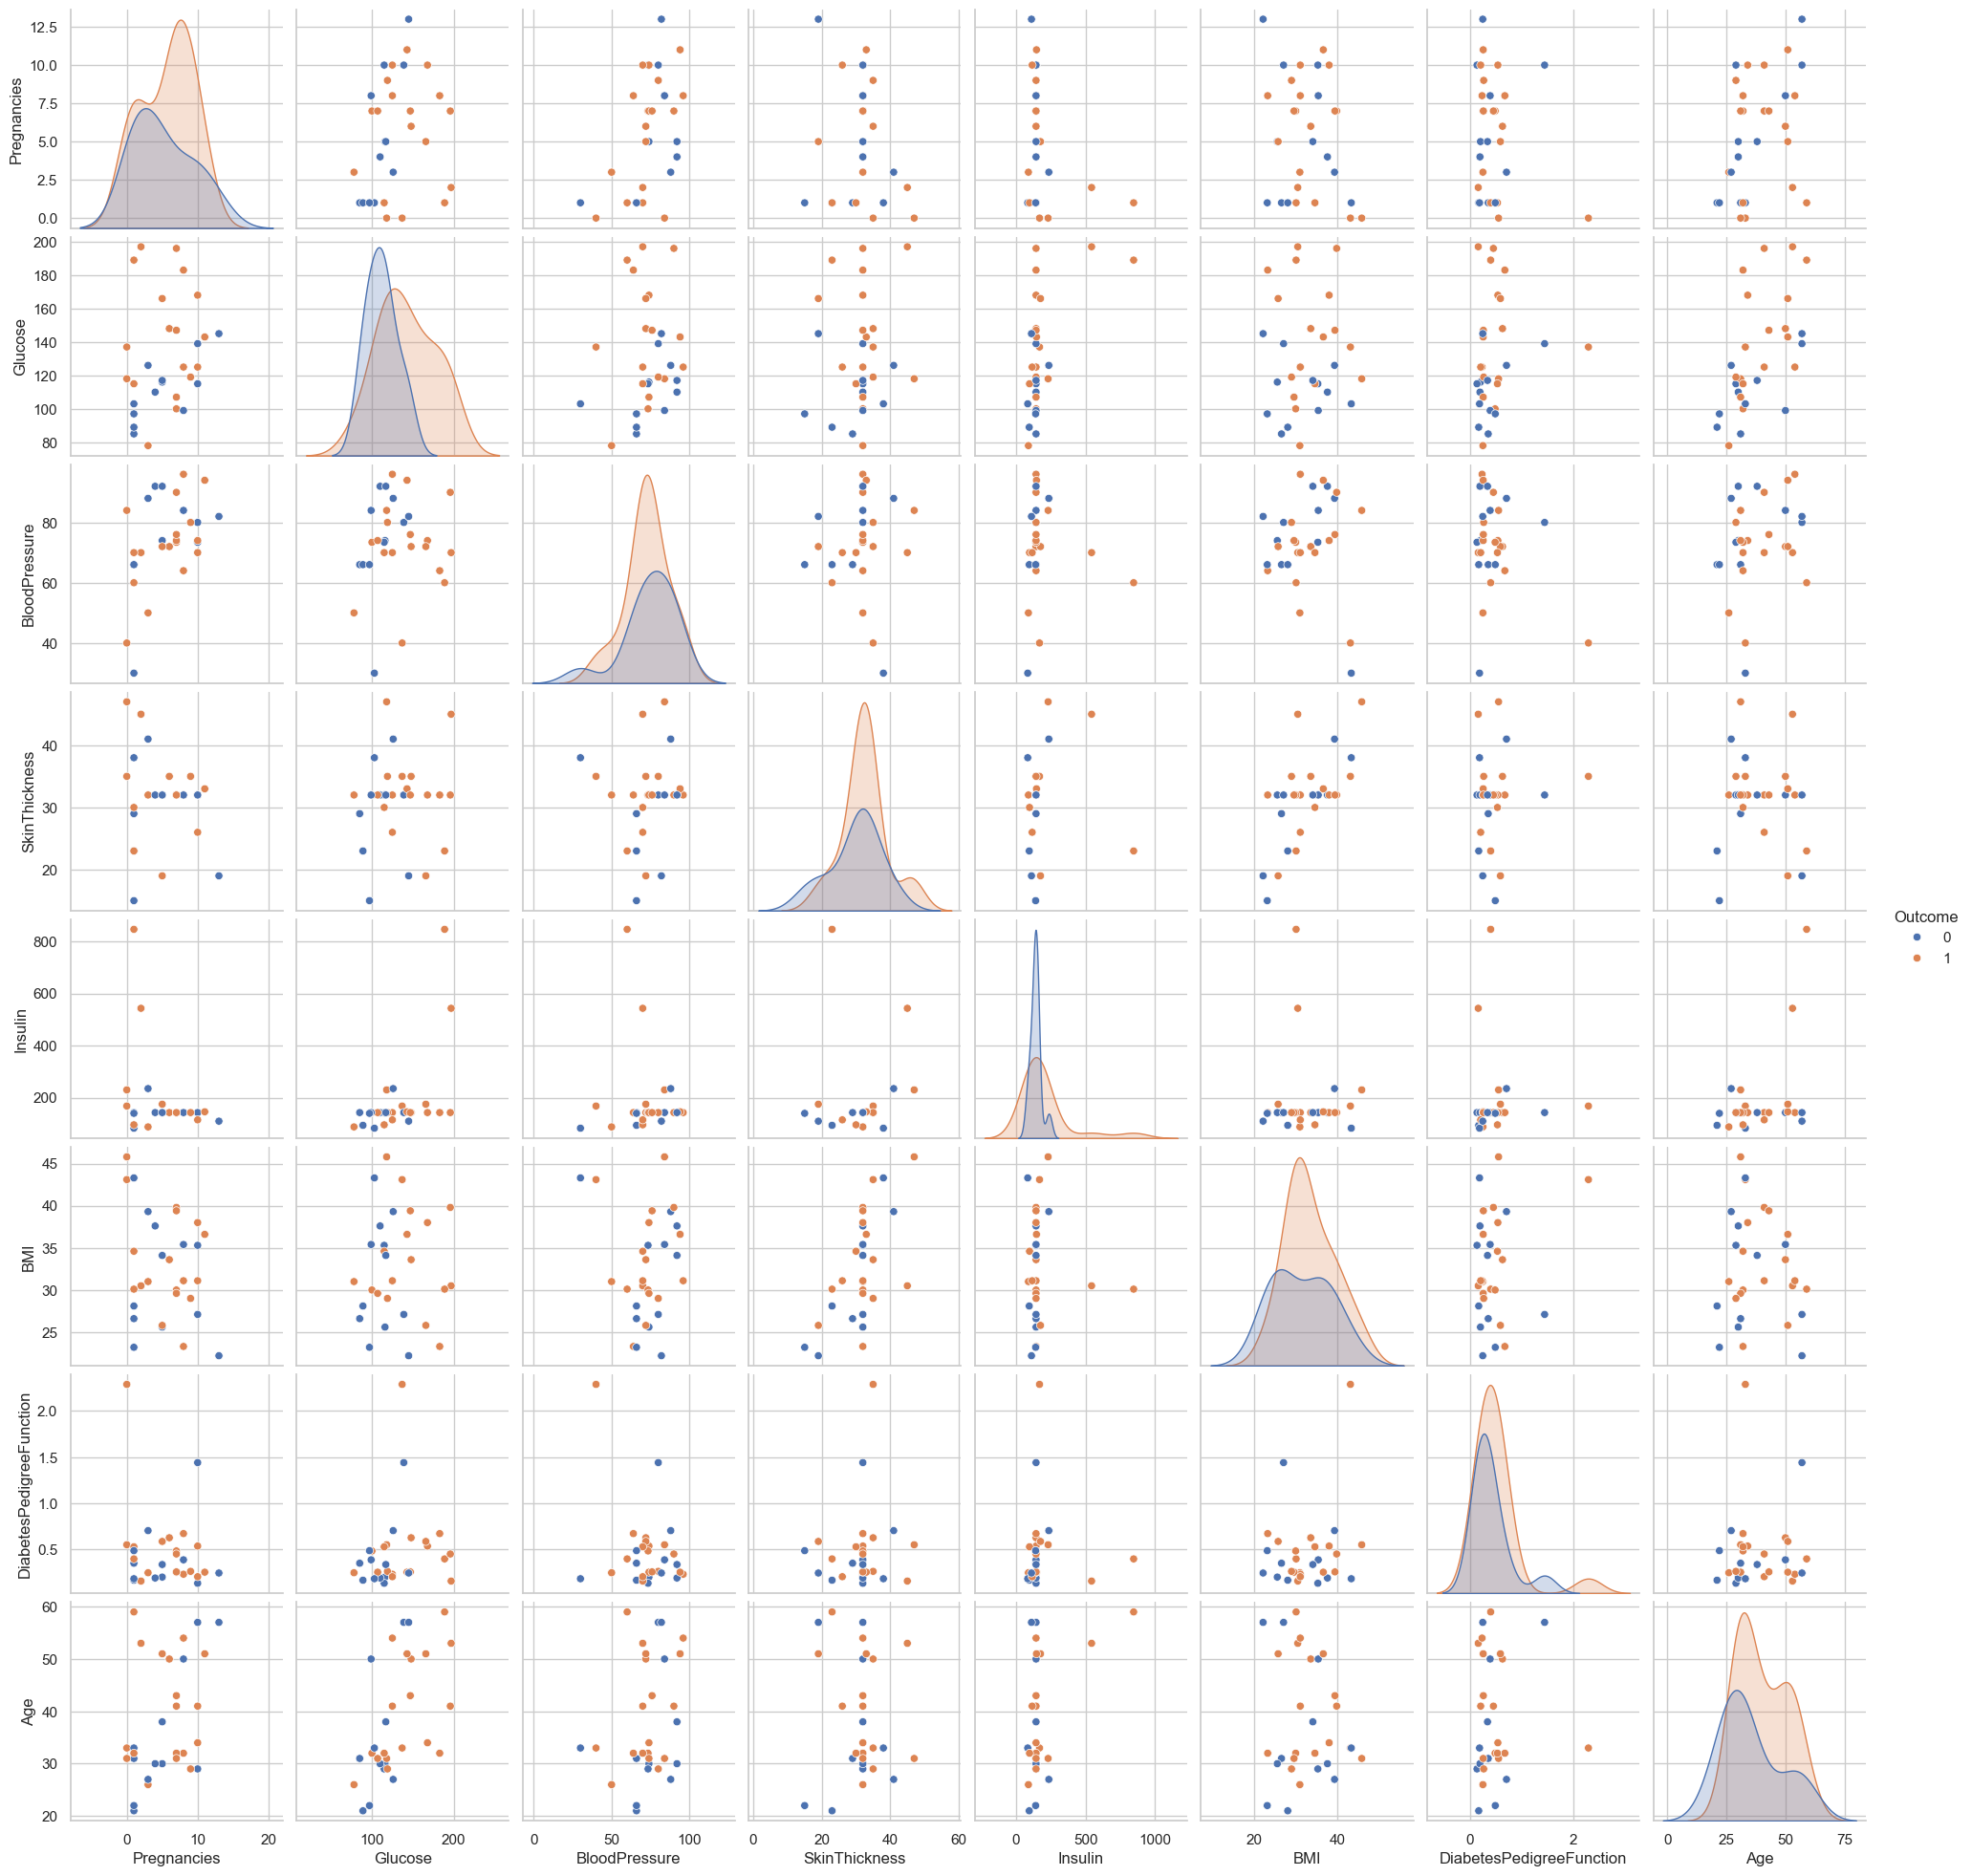

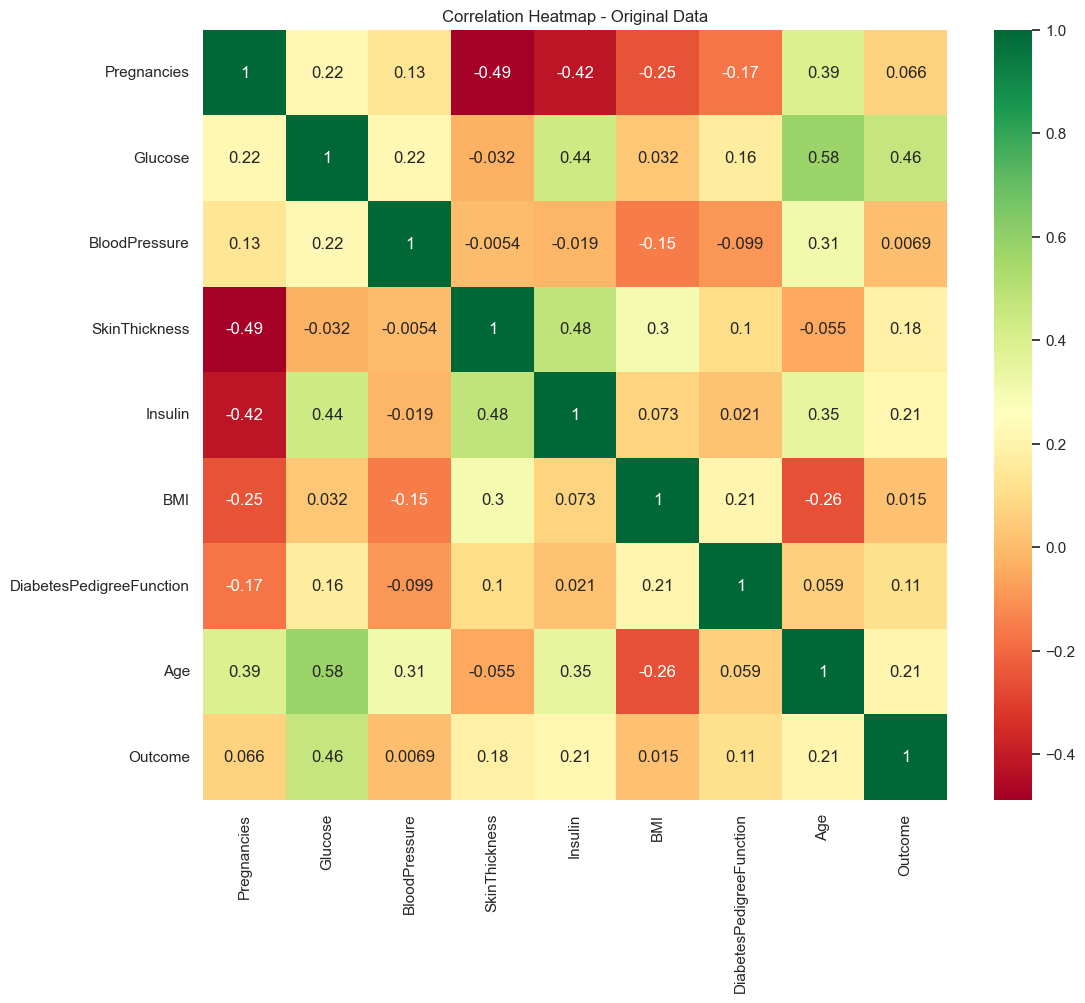

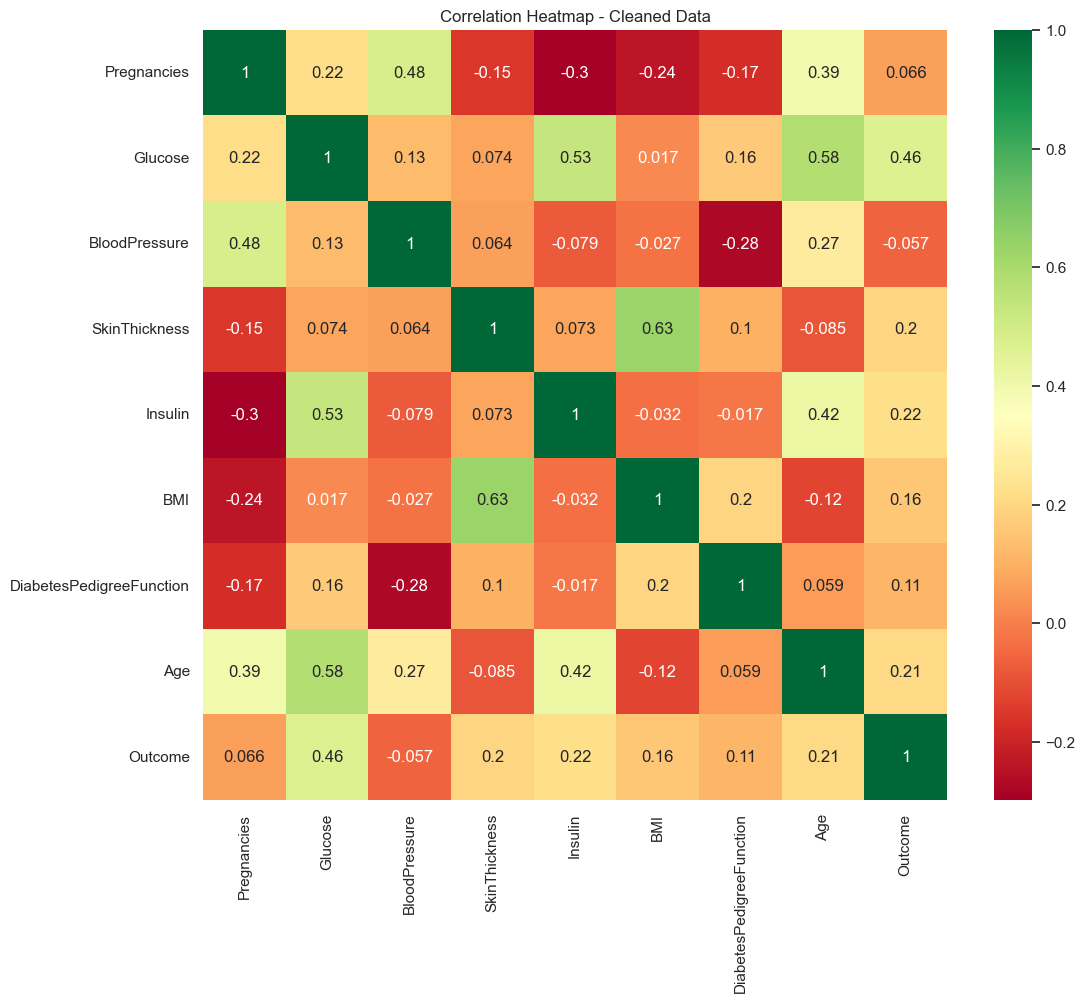

In [7]:
# Pairplot
sns.pairplot(data_copy, hue='Outcome')
plt.show()

# Correlation heatmaps
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap - Original Data")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(data_copy.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap - Cleaned Data")
plt.show()


In [8]:
# Standardization
sc_X = StandardScaler()
X = pd.DataFrame(
    sc_X.fit_transform(data_copy.drop(["Outcome"], axis=1)),
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
)
y = data_copy['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42, stratify=y
)



✅ Max test score: 70.00% at K = [1, 8]


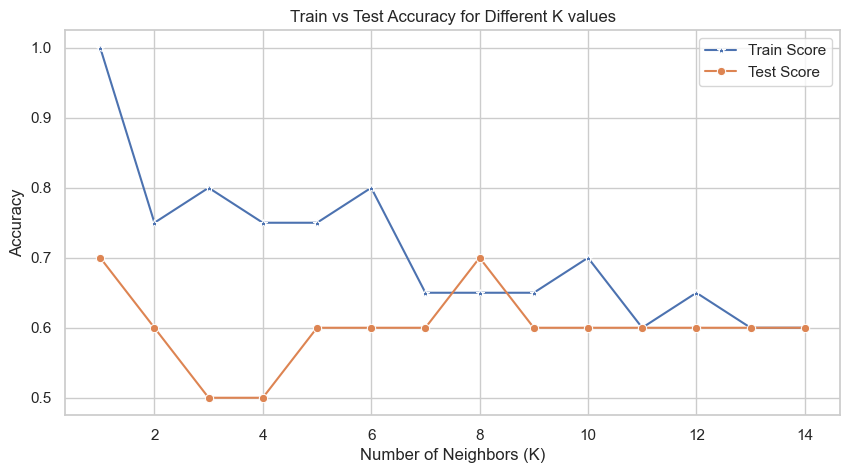

In [9]:
train_scores = []
test_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

max_test_score = max(test_scores)
best_k = [i+1 for i, v in enumerate(test_scores) if v == max_test_score]
print(f"\n✅ Max test score: {max_test_score*100:.2f}% at K = {best_k}")

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.title("Train vs Test Accuracy for Different K values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



KNN Test Accuracy: 60.00%


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


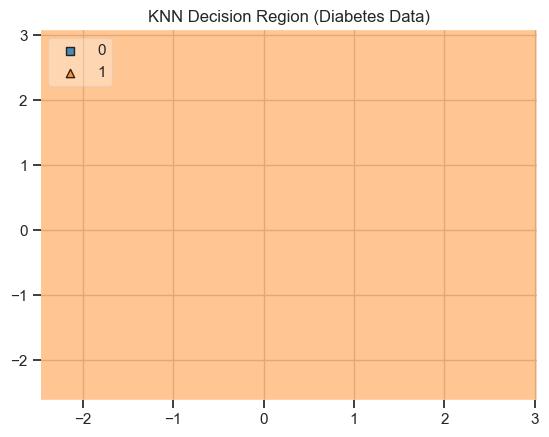

In [10]:
# Use best K (e.g., 11)
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
print(f"\nKNN Test Accuracy: {knn.score(X_test, y_test)*100:.2f}%")

# Decision region plot
value = 20000
width = 20000
plot_decision_regions(
    X.values, y.values, clf=knn, legend=2,
    filler_feature_values={i: value for i in range(2, 8)},
    filler_feature_ranges={i: width for i in range(2, 8)},
    X_highlight=X_test.values
)
plt.title("KNN Decision Region (Diabetes Data)")
plt.show()


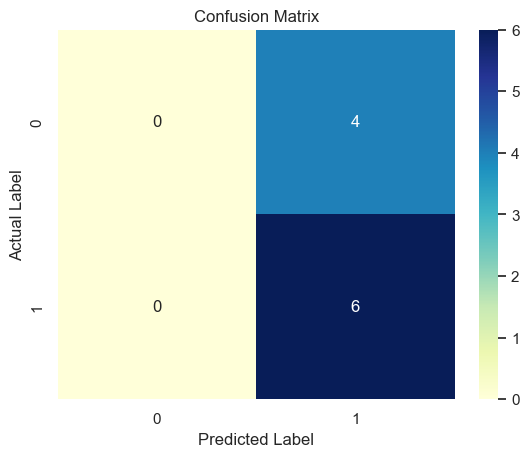

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,KNN,0.6,0.6,1.0,0.75,0.882353



Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75         6

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Confusion Matrix
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluation function
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2.0)
    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                           columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"])
    return results

results = model_evaluation(y_test, y_pred, "KNN")
display(results)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


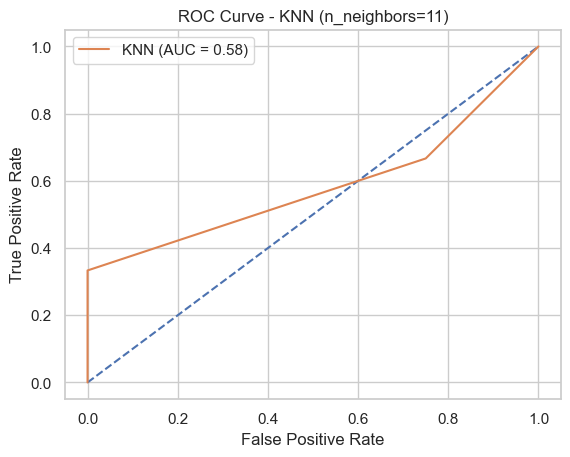

In [12]:
y_pred_proba = knn.predict_proba(X_test)[:, -1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (n_neighbors=11)')
plt.legend()
plt.show()


In [13]:
param_grid = {"n_neighbors": np.arange(1, 50)}
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
knn_gs.fit(X, y)

print("\nBest Parameters from GridSearchCV:", knn_gs.best_params_)
print("Best Cross-Validation Score:", knn_gs.best_score_)


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ~~~~~~~~~~~~^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\neig


Best Parameters from GridSearchCV: {'n_neighbors': np.int64(11)}
Best Cross-Validation Score: 0.6


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.6        0.53333333 0.56666667 0.53333333 0.5        0.43333333
 0.5        0.53333333 0.56666667 0.56666667 0.6        0.53333333
 0.6        0.56666667 0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
  warnings.warn(
